In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pImpactR import plot

### def : toy model parameters

In [2]:
# toy model param
tunex = 0.8538658
psi = tunex*2*np.pi
alpha = -2*np.pi*0.65346402

# control param
q_max = 12.0
k_max = 0.05

# dist param
Emit = [0.000014,0.00014,0.0014]
q0 = 0.07268870141054148
p0 = 0.0
xi0 = (q0**2+p0**2)**0.5

### Toy Model<center> $H = \frac{x^2 + p^2}{2} + \frac{\alpha}{2} \left(\frac{x^2 + p^2}{2}\right)^2$ </center>

In [3]:
def Map(z):
    action = 0.5*np.abs(z)**2
    return z*np.exp(1j*(psi+action*alpha))
Map = np.vectorize(Map)

### def : getCentroidData

In [4]:
def getCentroidData(nTurn,pDataN,emit0):
    pData = emit0**0.5*(pDataN[:,0]+1j*pDataN[:,1]) + q0 + 1j*p0    
    cData = np.zeros(nTurn,dtype=np.complex)
    for i in range(nTurn):
        cData[i] = np.sum(pData)/npt
        pData = Map(pData)
    return cData/cData[0]

### get cData from tracking

In [5]:
import pickle
nTurn = []
cData = []
npt = 100000
pDataN = np.random.normal(size=(npt,2))
for i in range(len(Emit)):
    nTurn.append(int(6.0/(Emit[i]**0.5*np.abs(alpha)*xi0)))
    print(Emit[i],nTurn[i])
#     cData.append(getCentroidData(nTurn[i],pDataN,Emit[i]))
    
# with open('cData.IOTAlatt.pickle', 'wb') as f:
#     pickle.dump(cData, f)
    
with open('cData.IOTAlatt.pickle', 'rb') as f:
    cData=pickle.load(f)

1.4e-05 5373
0.00014 1699
0.0014 537


### get cData from modeling

In [6]:
def GaussDist(x):
    return np.exp(-x**2/2.0)/np.sqrt(2.0*np.pi)

Q = np.linspace(-q_max,q_max,2048)
histData = GaussDist(Q)
dq = Q[1]-Q[0]

cDataModel = [0]*len(Emit)
for i in range(len(Emit)):
    cDataModel[i]=np.zeros(nTurn[i],dtype=np.complex)
    for t in range(nTurn[i]):
        cDataModel[i][t] = np.sum(histData*np.exp(-1j*t*Emit[i]**0.5*Q*xi0*alpha)*dq)*np.exp(-1j*psi*t)    
    cDataModel[i] = cDataModel[i]/cDataModel[i][0]

# Compare cData Time Domain

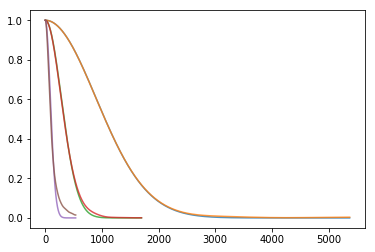

In [7]:
for i in range(len(Emit)):
    plt.plot(np.abs(cDataModel[i]),alpha=0.8)
    plt.plot(np.abs(cData[i]),     alpha=0.8)

# Compare cData Freq Domain

In [8]:
# from pImpactR.util import naff
# TuneNaff = [0]*len(Emit)
# AmpNaff  = [0]*len(Emit)
# for i in range(len(Emit)):
#     TuneNaff[i], AmpNaff[i], testData1 = naff(1,cData[i])

In [9]:
TuneNaff = [tunex + alpha/(2*np.pi)*(xi0**2/2)]*len(Emit)

In [10]:
nSample = 2048
K = np.linspace(-k_max,k_max,nSample)
Tune = [0]*len(Emit)
Amp  = [0]*len(Emit)
for i in range(len(Emit)):
    Amp[i] = np.zeros(nSample,dtype=np.complex)
    Tune[i] = TuneNaff[i] + K
    for k in range(nSample):
        Amp[i][k] = np.sum(cData[i]*np.exp(-2j*np.pi*Tune[i][k]*np.arange(0,nTurn[i])))
    Amp[i] = Amp[i]*Emit[i]**0.5

In [11]:
Q = Q
histData = histData*np.pi/(xi0*np.abs(alpha))

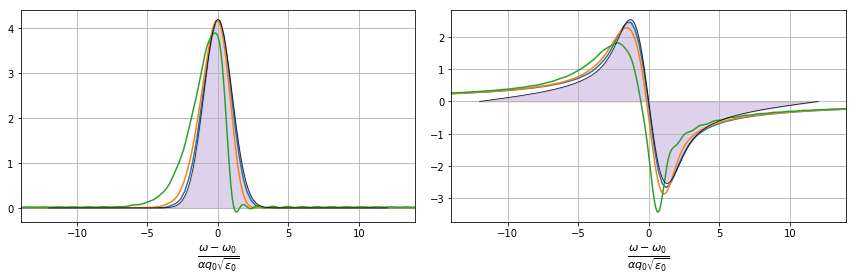

In [12]:
from scipy.signal import hilbert
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
for i in range(len(Emit)):
    plt.plot(2*np.pi*K/(Emit[i]**0.5*xi0*np.abs(alpha)),np.real(Amp[i]))
plt.plot(Q,histData,color='k',alpha=0.9,linewidth=0.8)
plt.fill_between(Q, 0, histData,color='C4',alpha=0.3)
plt.xlim(-14.0,14.0)
plt.xlabel(r'$\frac{\omega-\omega_0}{\alpha q_0 \sqrt{\epsilon_0}}$',fontsize=16);
plt.grid()

hilbertData = -np.imag(hilbert(histData))
plt.subplot(1,2,2)
for i in range(len(Emit)):
    plt.plot(2*np.pi*K/(Emit[i]**0.5*xi0*np.abs(alpha)),np.imag(Amp[i]))
plt.plot(Q,hilbertData,color='k',alpha=0.9,linewidth=0.8)
plt.fill_between(Q, 0, hilbertData,color='C4',alpha=0.3)
plt.xlabel(r'$\frac{\omega-\omega_0}{\alpha q_0 \sqrt{\epsilon_0}}$',fontsize=16);
plt.xlim(-14.0,14.0)
plt.grid()
plt.tight_layout()